In [25]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

##### Importing dataset and reading it


In [26]:
df = pd.read_csv("used_cars_UK.csv")

df.head(10)

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
5,5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN
6,6,Ford Focus,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
7,7,Vauxhall Corsa,1995,90000,2009,NaN,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,NaN
8,8,Volvo 740,750,225318,1989,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN
9,9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN


#### Descriptive analytics


In [27]:
df.info

<bound method DataFrame.info of       Unnamed: 0           title  Price  Mileage(miles)  Registration_Year  \
0              0     SKODA Fabia   6900           70189               2016   
1              1  Vauxhall Corsa   1495           88585               2008   
2              2     Hyundai i30    949          137000               2011   
3              3      MINI Hatch   2395           96731               2010   
4              4  Vauxhall Corsa   1000           85000               2013   
...          ...             ...    ...             ...                ...   
3680        4723  Renault Megane   1395           76202               2006   
3681        4724         Audi A4   6990          119000               2012   
3682        4725    BMW 3 Series   3995          139000               2013   
3683        4726    Honda Accord   1390          179190               2007   
3684        4727  Vauxhall Corsa   2000           82160               2013   

      Previous Owners Fuel type

In [28]:
df.shape

(3685, 14)

In [29]:
df.describe()

,Unnamed: 0,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,2314.770963,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,1415.821308,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,0.000000,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,1059.000000,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,2279.000000,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,3593.000000,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,4727.000000,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


In [30]:
df.values

array([[0, 'SKODA Fabia', 6900, ..., 5.0, 'Euro 6', nan],
       [1, 'Vauxhall Corsa', 1495, ..., 5.0, 'Euro 4', 'Full'],
       [2, 'Hyundai i30', 949, ..., 5.0, 'Euro 5', nan],
       ...,
       [4725, 'BMW 3 Series', 3995, ..., 5.0, 'Euro 5', nan],
       [4726, 'Honda Accord', 1390, ..., 5.0, 'Euro 4', 'Full'],
       [4727, 'Vauxhall Corsa', 2000, ..., 5.0, 'Euro 5', nan]],
      dtype=object)

In [31]:
df.columns

Index(['Unnamed: 0', 'title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history'],
      dtype='object')

In [32]:
df.isnull().sum()

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

In [33]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0:
        print(f" {i}'s null rate: {null_rate}%")

 Previous Owners's null rate: 38.236092265943014%
 Engine's null rate: 1.2211668928086838%
 Doors's null rate: 0.6784260515603799%
 Seats's null rate: 0.9497964721845319%
 Emission Class's null rate: 2.360922659430122%
 Service history's null rate: 85.3459972862958%


In [34]:
df["Engine"]

0       1.4L
1       1.2L
2       1.4L
3       1.4L
4       1.3L
        ... 
3680    1.6L
3681    2.0L
3682    2.0L
3683    2.2L
3684    1.2L
Name: Engine, Length: 3685, dtype: object

filling in or removing missing values


In [35]:
df.dtypes

Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

In [36]:
# column renaming and type chaning

df.rename(columns={'Mileage(miles)':'Mileage'}, inplace = True)

df['Previous Owners'] = df['Previous Owners'].astype('Int64')
df['Doors'] = df['Doors'].astype('Int64')
df['Seats'] = df['Seats'].astype('Int64')




In [37]:
df.dtypes

Unnamed: 0            int64
title                object
Price                 int64
Mileage               int64
Registration_Year     int64
Previous Owners       Int64
Fuel type            object
Body type            object
Engine               object
Gearbox              object
Doors                 Int64
Seats                 Int64
Emission Class       object
Service history      object
dtype: object

In [38]:
df.dropna(subset=["Engine"], inplace=True)
df["Doors"].fillna(df["Doors"].median(), inplace=True)
df["Seats"].fillna(df["Seats"].median(), inplace=True)
df.drop('Service history', axis=1, inplace=True)
df['Previous Owners'].fillna(df['Previous Owners'].median(), inplace=True)


In [39]:
df.head()

,Unnamed: 0,title,Price,Mileage,Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class
0,0,SKODA Fabia,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5,5,Euro 6
1,1,Vauxhall Corsa,1495,88585,2008,4,Petrol,Hatchback,1.2L,Manual,3,5,Euro 4
2,2,Hyundai i30,949,137000,2011,3,Petrol,Hatchback,1.4L,Manual,5,5,Euro 5
3,3,MINI Hatch,2395,96731,2010,5,Petrol,Hatchback,1.4L,Manual,3,4,Euro 4
4,4,Vauxhall Corsa,1000,85000,2013,3,Diesel,Hatchback,1.3L,Manual,5,5,Euro 5


In [40]:
df.drop('Emission Class', axis=1, inplace=True)

In [41]:
df.head()

,Unnamed: 0,title,Price,Mileage,Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats
0,0,SKODA Fabia,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5,5
1,1,Vauxhall Corsa,1495,88585,2008,4,Petrol,Hatchback,1.2L,Manual,3,5
2,2,Hyundai i30,949,137000,2011,3,Petrol,Hatchback,1.4L,Manual,5,5
3,3,MINI Hatch,2395,96731,2010,5,Petrol,Hatchback,1.4L,Manual,3,4
4,4,Vauxhall Corsa,1000,85000,2013,3,Diesel,Hatchback,1.3L,Manual,5,5


In [42]:
# Examining distribution

milage_distribution = df['Mileage'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

<AxesSubplot:ylabel='Frequency'>

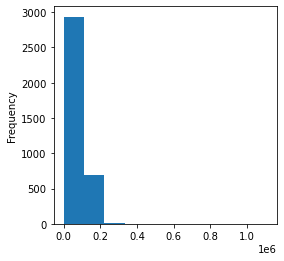

In [43]:
df['Mileage'].plot.hist(figsize=(4, 4))

<AxesSubplot:>

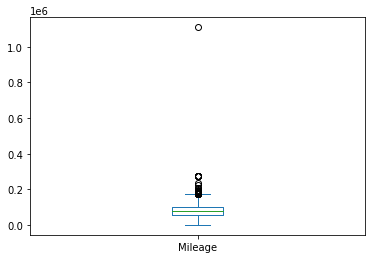

In [44]:
df['Mileage'].plot.box()